# Data pre-processing

In [15]:
%matplotlib inline
import time
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial.distance import squareform
from scipy.ndimage import rotate
import scipy.misc
import itertools

In [16]:
#import skimage.filter

def FindAngle(digit):
    '''Finds the angle of the main axis of the digit
    so that it can be adjusted'''
    # stores x and y coordinates of non-zero pixels
    y, x = np.nonzero(digit)

    # subtracts means
    x = x - np.mean(x)
    y = y - np.mean(y)
    coords = np.vstack([x, y])

    # calcultes Covariance matrix and its eigenvectors and eigenvalues
    cov = np.cov(coords)
    evals, evecs = np.linalg.eig(cov)

    # Sort eigenvalues in decreasing order (we only have 2 values)
    sort_indices = np.argsort(evals)[::-1]
    x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
    x_v2, y_v2 = evecs[:, sort_indices[1]]

    return -np.rad2deg(np.arctan((x_v1)/(y_v1)))
    
    
def RotateDigit(x, theta):
    '''Adjusts a digit x by an angle theta.'''
    x = np.reshape(x, (28,28))
    x = rotate(x, theta, axes=(1,0), reshape=False, output=None, order=3, mode='constant', cval=0.0, prefilter=True)
    return x

### training set

In [17]:
data = open('mnist_train.csv')

csv_file = csv.reader(data)

training_points = []

for row in csv_file:
    training_points.append(row)
# Remove "headers" of our csv file
training_points.pop(0)

data.close()

# Convert string into integer
training_points= np.int_(training_points)

# Pick a ration for splitting the digits into a training and a validation set.
ratio = int(len(training_points)*0.20)
validation_set = training_points[:ratio]
training_set = training_points[ratio:]

# Separates the first column, which are the labels/target from or input points
# for the validation and training set
y_validation = validation_set[:,0]
x_validation = validation_set[:,1:]
y_train = training_set[:,0]
x_train = training_set[:,1:]

# For algorithm implementation purpose, create smaller training set
small_y = y_train[:400]
small_x = x_train[:400]
small_set = training_set[:400]

# creates a new training set with adjusted rotations
angle = np.zeros(small_x.shape[0])
small_x_adj = np.zeros(small_x.shape)
for row in range(small_x.shape[0]):
    angle[row] = FindAngle(small_x[row].reshape(28,28))
    small_x_adj[row] =  RotateDigit(small_x[row], angle[row]).reshape(784)


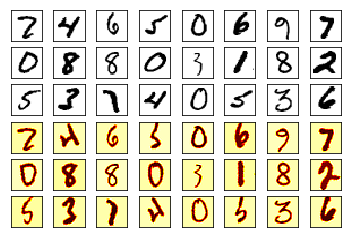

In [18]:
n_samples = 24
lines = 6
fig, ax = plt.subplots(lines, int(n_samples / (lines / 2)), subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    if i < n_samples:
        axi.imshow(small_x[i].reshape(28, 28), cmap='gray_r')
    else:
        axi.imshow(small_x_adj[i - n_samples].reshape(28, 28), cmap='hot_r')

### test set

In [19]:
data = open('mnist_test.csv')

csv_file = csv.reader(data)

testing_points = []

for row in csv_file:
    testing_points.append(row)

# Remove "headers" of our csv file
testing_points.pop(0)


data.close()

# Convert string into integer
testing_points= np.int_(testing_points)
        
# Separates the first column, which are the labels (y_test)
# from or input points (x_test)
y_test = testing_points[:,0]
x_test = testing_points[:,1:]
print(testing_points)
# creates a new test set with adjusted rotations
angle_test = np.zeros(x_test.shape[0])
x_test_adj = np.zeros(x_test.shape)
for row in range(x_test.shape[0]):
    angle_test[row] = FindAngle(x_test[row].reshape(28,28))
    x_test_adj[row] =  RotateDigit(x_test[row], angle_test[row]).reshape(784)


[[7 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]]


### Plotting utility functions

In [20]:
from scipy.ndimage import rotate
def RotateDigit(x, theta):
    x = np.reshape(x, (28,28))
    x = rotate(x, theta, axes=(1,0), reshape=False, output=None, order=3, mode='constant', cval=0.0, prefilter=True)
    #x = np.reshape(x, (748))
    return x

In [21]:
def visualizeDigit(x):
    # Vector conversion from 1 to 2 dimensions
    matrix = np.reshape(x, (28,28))
    plt.imshow(matrix, cmap='gray')
    plt.show()

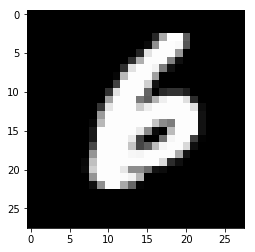

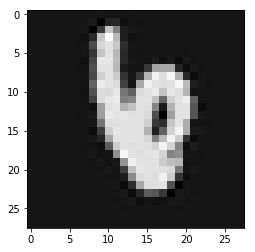

In [22]:
visualizeDigit(small_x[5])
visualizeDigit(RotateDigit(small_x[5], 45))

9


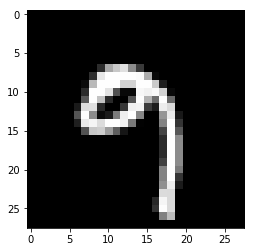

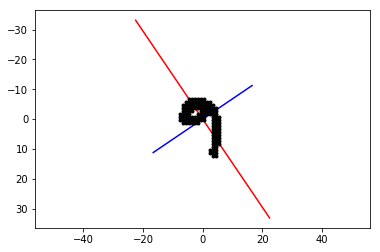

34.124385616405334


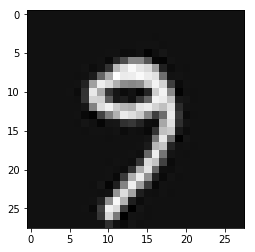

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
#import skimage.filter

#img = misc.imread('oval.png', flatten=1)
# Stores x and y coordinates of non-zero pixels
i=6
RotatedDigit = RotateDigit(small_x[i], 0)
print(small_y[i])
visualizeDigit(RotatedDigit)
y, x = np.nonzero(RotatedDigit)

# Subtracts means
x = x - np.mean(x)
y = y - np.mean(y)
coords = np.vstack([x, y])

# Calculates Covariance matrix and its eigenvectors and eigenvalues
cov = np.cov(coords)
evals, evecs = np.linalg.eig(cov)

# Sorts eigenvalues in decreasing order (we only have 2 values)
sort_indices = np.argsort(evals)[::-1]
x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
x_v2, y_v2 = evecs[:, sort_indices[1]]

scale = 20
plt.plot([x_v1*-scale*2, x_v1*scale*2],
         [y_v1*-scale*2, y_v1*scale*2], color='red')
plt.plot([x_v2*-scale, x_v2*scale],
         [y_v2*-scale, y_v2*scale], color='blue')
plt.plot(x, y, 'k.')
plt.axis('equal')
plt.gca().invert_yaxis()  # Match the image system with origin at top left
plt.show()


#theta = np.tanh((x_v1)/(y_v1))
theta = np.rad2deg(np.arctan((x_v1)/(y_v1))) 
print(theta)
visualizeDigit(RotateDigit(RotatedDigit, -theta))

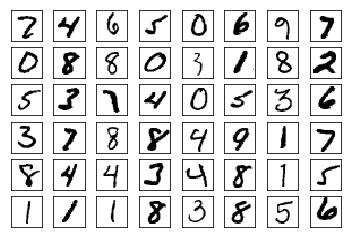

In [24]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(small_x[i].reshape(28, 28), cmap='gray_r')

In [25]:
def plot_cm(cm, true_label, predicted_label, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Plots confusion matrix.
    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    plt.figure(1, figsize=(5, 5), dpi=100)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(true_label))
    plt.xticks(tick_marks, predicted_label, rotation=45)
    plt.yticks(tick_marks, true_label)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))   
    

#### Second Similarity Adjustment: +/- 20 degrees each side, then average with the original image

In [26]:
def rotate_degrees(array, angle = 20, axes=(1, 0), reshape=False):
    # 1) !!! Angles work counter clockwise
    # 2) The two axes that define the plane of rotation. Default is the first two axes.
    # 3) If reshape is true, the output shape is adapted so that the input array is contained completely in the output.
    #    set to false to keep a 28x28 matrix
    nparray = np.asarray(array)
    newArray = scipy.ndimage.rotate(nparray, angle, axes, reshape)
    return newArray

def average_rotation(a):
    # Averaging a over 3 orientation
    a2 = rotate_degrees(a,20)
    
    a4 = rotate_degrees(a, -20)
    
    sumof = (a+a2+a4)
    return (sumof / 3).reshape(784)

# Creation of a new dataset for testing purposes
new_x_test = np.zeros((x_test_adj.shape[0],x_test_adj.shape[1]))
for i in range(x_test.shape[0]):
    a = np.asarray(x_test_adj[i]).reshape(28,28)
    new_x_test[i,...] = average_rotation(a)


# Distances

In [27]:
def euclidean(a, b):
    return np.linalg.norm(a-b)


# Algorithms

## Binary Partition

In [28]:

from sklearn.cluster import AgglomerativeClustering

class agglo_cluster:
    def __init__(self, clusters, dataset, labels):
        self.clusters = clusters
        self.dataset = dataset
        self.labels = labels

        print('Training...')
        t1 = time.process_time()
        clustering = AgglomerativeClustering(self.clusters).fit(self.dataset)
        self.predicted_labels = clustering.labels_
        t2 = time.process_time()


        print('Training completed.')
        print('It took us ', t2-t1, ' seconds to cluster ', self.dataset.shape[0],'  datapoints in ', self.clusters, 'clusters')

        #testValue = 0
        #print(predicted_labels[testValue])
        #visualizeDigit(small_x[testValue])
        #print(small_y[testValue])
    def cluster_matrix(self):
        print('\nTrue labels matrix\n')
        self.results= np.zeros((self.clusters, 10))
        
        # Loop to count the composition (true label) of each predicted clusters
        for x in range(self.clusters):
            for y in range(self.predicted_labels.shape[0]):
                if(self.predicted_labels[y] == x):
                    self.results[x , self.labels[y]] += 1
        
        print(self.results)
        print('\nThis calculates what each clusters contain ')
        print('Rows are clusters and columns are true labels of this cluster elements')
    
    def error_rate(self):
        # Assign majority label to each cluster
        cluster_label = np.argmax(self.results, axis=1)
        print('Assigned labels for each cluster: ', cluster_label)    

        # Then count instances of that cluster whose true label is not equal label assigned to this class
        error_rate = np.zeros((self.clusters))
        error_rate_percent = np.zeros((self.clusters))
        for i in range(self.clusters):
            for j in range(self.dataset.shape[0]):
                if self.predicted_labels[j] == i and self.labels[j] != cluster_label[i] :
                    error_rate[i] += 1
            #error_rate_percent[i] = error_rate[i] / (np.sum(results, axis=0))
        print('\nMisclassified examples in cluster \'index\': ' , error_rate, '\n')
        error_percent = np.round(np.divide(error_rate, (np.sum(self.results, axis=1)))  *100, 2)  
        for i in range(self.clusters):
            print('Percentage error in cluster ', i+1, ' with majority of ', cluster_label[i],'\'s: ', error_percent[i],'%')
        average_error = np.average(error_percent)
        print('\nAverage Error: ', average_error,'%')
        return average_error
    
    

### Error rate with each clusters, as a function of the amount of clusters (dataset of 10 000 examples)

In [33]:
# Testing error with different hyper parameters values
error_values = np.zeros((15))
for i in range(15):
    model = agglo_cluster(i+1,x_test, y_test)
    model.cluster_matrix()
    error_values[i] = model.error_rate()
#####################################################
# With Adjusted distance
error_values2 = np.zeros((15))
for i in range(15):
    model2 = agglo_cluster(i+1,x_test_adj, y_test)
    model2.cluster_matrix()
    error_values2[i] = model2.error_rate()

##########################################################
error_values3 = np.zeros((15))
for i in range(15):
    model3 = agglo_cluster(i+1, new_x_test, y_test)
    model3.cluster_matrix()
    error_values3[i] = model3.error_rate()



Training...
Training completed.
It took us  49.1875  seconds to cluster  10000   datapoints in  1 clusters

True labels matrix

[[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]]

This calculates what each clusters contain 
Rows are clusters and columns are true labels of this cluster elements
Assigned labels for each cluster:  [1]

Misclassified examples in cluster 'index':  [8865.] 

Percentage error in cluster  1  with majority of  1 's:  88.65 %

Average Error:  88.65 %
Training...
Training completed.
It took us  48.9375  seconds to cluster  10000   datapoints in  2 clusters

True labels matrix

[[   7. 1121.   83.   23.  951.  208.    8. 1007.   29.  967.]
 [ 973.   14.  949.  987.   31.  684.  950.   21.  945.   42.]]

This calculates what each clusters contain 
Rows are clusters and columns are true labels of this cluster elements
Assigned labels for each cluster:  [1 3]

Misclassified examples in cluster 'index':  [3283. 4609.] 

Percentage error in cluster  1  wit

Training completed.
It took us  48.90625  seconds to cluster  10000   datapoints in  10 clusters

True labels matrix

[[  0.   2.   2.   3. 734.   7.   1.  59.   3. 789.]
 [959.   0.  10.   0.   0.   5.   7.   0.   3.   1.]
 [  2.   5.  11. 920.   1. 248.   5.   2. 162.  17.]
 [  3.   0.  13.  59.   4. 416.   4.   9. 768.  17.]
 [  9.   6.   7.   6.  24.  15. 933.   1.   4.   3.]
 [  0. 763.   0.   0.   1.   0.   0.   4.   3.   1.]
 [  0.   3. 908.   2.   2.   0.   1.   9.   8.   4.]
 [  4.   2.  62.   9. 201. 201.   5. 232.  18. 156.]
 [  2.   0.  18.  11.  12.   0.   0. 704.   5.  20.]
 [  1. 354.   1.   0.   3.   0.   2.   8.   0.   1.]]

This calculates what each clusters contain 
Rows are clusters and columns are true labels of this cluster elements
Assigned labels for each cluster:  [9 0 3 8 6 1 2 7 7 1]

Misclassified examples in cluster 'index':  [811.  26. 453. 525.  75.   9.  29. 658.  68.  16.] 

Percentage error in cluster  1  with majority of  9 's:  50.69 %
Percentage err

Training completed.
It took us  49.0  seconds to cluster  10000   datapoints in  15 clusters

True labels matrix

[[  0.   3. 908.   2.   2.   0.   1.   9.   8.   4.]
 [603.   0.   7.   0.   0.   3.   6.   0.   1.   0.]
 [  0. 763.   0.   0.   1.   0.   0.   4.   3.   1.]
 [  4.   2.  62.   9. 201. 201.   5. 232.  18. 156.]
 [  0.   2.   2.   2. 525.   5.   1.  33.   1. 582.]
 [  1.   0.  13.  46.   3.   2.   0.   9. 723.  17.]
 [  2.   0.   6.   0.   8.  11. 718.   1.   1.   1.]
 [  0.   2.   8. 386.   1. 170.   0.   1. 137.   8.]
 [  2.   0.  18.  11.  12.   0.   0. 704.   5.  20.]
 [  1. 354.   1.   0.   3.   0.   2.   8.   0.   1.]
 [  0.   0.   0.   1. 209.   2.   0.  26.   2. 207.]
 [356.   0.   3.   0.   0.   2.   1.   0.   2.   1.]
 [  7.   6.   1.   6.  16.   4. 215.   0.   3.   2.]
 [  2.   3.   3. 534.   0.  78.   5.   1.  25.   9.]
 [  2.   0.   0.  13.   1. 414.   4.   0.  45.   0.]]

This calculates what each clusters contain 
Rows are clusters and columns are true labels

Training completed.
It took us  48.484375  seconds to cluster  10000   datapoints in  8 clusters

True labels matrix

[[2.000e+00 1.000e+00 1.270e+02 1.300e+01 3.400e+02 4.700e+01 2.200e+01
  9.670e+02 4.100e+01 7.350e+02]
 [9.620e+02 0.000e+00 8.000e+00 0.000e+00 1.000e+00 7.000e+00 1.530e+02
  1.000e+00 2.000e+00 4.000e+00]
 [0.000e+00 9.000e+00 8.540e+02 9.000e+00 3.000e+00 0.000e+00 0.000e+00
  8.000e+00 8.000e+00 1.000e+00]
 [7.000e+00 0.000e+00 9.000e+00 2.000e+00 2.250e+02 1.570e+02 7.370e+02
  1.000e+01 1.000e+01 4.800e+01]
 [5.000e+00 2.000e+00 1.900e+01 1.820e+02 7.000e+00 6.520e+02 3.600e+01
  3.000e+00 8.670e+02 2.600e+01]
 [1.000e+00 1.117e+03 1.000e+00 0.000e+00 0.000e+00 0.000e+00 4.000e+00
  5.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 4.000e+00 8.000e+02 3.000e+00 2.700e+01 5.000e+00
  1.100e+01 3.700e+01 1.100e+01]
 [2.000e+00 5.000e+00 1.000e+01 4.000e+00 4.030e+02 2.000e+00 1.000e+00
  2.300e+01 8.000e+00 1.840e+02]]

This calculates what each clusters conta

Training completed.
It took us  50.171875  seconds to cluster  10000   datapoints in  12 clusters

True labels matrix

[[3.310e+02 0.000e+00 4.000e+00 0.000e+00 1.000e+00 7.000e+00 1.480e+02
  1.000e+00 0.000e+00 2.000e+00]
 [2.000e+00 1.000e+00 6.600e+01 1.000e+01 2.970e+02 4.400e+01 1.500e+01
  5.410e+02 3.600e+01 7.270e+02]
 [0.000e+00 9.000e+00 8.540e+02 9.000e+00 3.000e+00 0.000e+00 0.000e+00
  8.000e+00 8.000e+00 1.000e+00]
 [3.000e+00 0.000e+00 6.000e+00 1.740e+02 0.000e+00 6.380e+02 3.000e+01
  1.000e+00 1.600e+02 2.300e+01]
 [3.000e+00 0.000e+00 9.000e+00 0.000e+00 2.220e+02 1.500e+01 2.070e+02
  1.000e+01 7.000e+00 4.700e+01]
 [4.000e+00 0.000e+00 0.000e+00 2.000e+00 3.000e+00 1.420e+02 5.300e+02
  0.000e+00 3.000e+00 1.000e+00]
 [1.000e+00 1.000e+00 4.000e+00 8.000e+02 3.000e+00 2.700e+01 5.000e+00
  1.100e+01 3.700e+01 1.100e+01]
 [2.000e+00 5.000e+00 1.000e+01 4.000e+00 4.030e+02 2.000e+00 1.000e+00
  2.300e+01 8.000e+00 1.840e+02]
 [0.000e+00 0.000e+00 6.100e+01 3.000e+00

Training completed.
It took us  48.875  seconds to cluster  10000   datapoints in  1 clusters

True labels matrix

[[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]]

This calculates what each clusters contain 
Rows are clusters and columns are true labels of this cluster elements
Assigned labels for each cluster:  [1]

Misclassified examples in cluster 'index':  [8865.] 

Percentage error in cluster  1  with majority of  1 's:  88.65 %

Average Error:  88.65 %
Training...
Training completed.
It took us  49.234375  seconds to cluster  10000   datapoints in  2 clusters

True labels matrix

[[   4. 1124.  156.   29.  744.   33.   60.  867.   80.  904.]
 [ 976.   11.  876.  981.  238.  859.  898.  161.  894.  105.]]

This calculates what each clusters contain 
Rows are clusters and columns are true labels of this cluster elements
Assigned labels for each cluster:  [1 3]

Misclassified examples in cluster 'index':  [2877. 5018.] 

Percentage error in cluster  1  with majority 

Training completed.
It took us  48.53125  seconds to cluster  10000   datapoints in  9 clusters

True labels matrix

[[1.000e+00 3.000e+00 1.000e+01 1.210e+02 2.100e+01 6.580e+02 6.300e+01
  3.000e+00 7.600e+02 1.900e+01]
 [1.100e+01 7.000e+00 8.580e+02 1.400e+01 1.940e+02 1.500e+01 4.000e+00
  1.480e+02 2.000e+01 6.400e+01]
 [4.000e+00 0.000e+00 0.000e+00 0.000e+00 1.900e+01 8.800e+01 8.150e+02
  0.000e+00 5.000e+00 5.000e+00]
 [1.000e+00 0.000e+00 5.500e+01 1.000e+01 7.330e+02 1.200e+01 2.200e+01
  7.000e+01 3.100e+01 8.810e+02]
 [5.520e+02 0.000e+00 1.000e+00 9.000e+00 0.000e+00 9.000e+00 4.000e+00
  1.000e+00 1.000e+00 2.000e+00]
 [1.000e+00 1.123e+03 2.300e+01 1.500e+01 9.000e+00 2.000e+01 3.800e+01
  3.400e+01 3.900e+01 6.000e+00]
 [0.000e+00 1.000e+00 3.000e+00 8.330e+02 3.000e+00 7.900e+01 3.000e+00
  8.000e+00 1.060e+02 1.200e+01]
 [2.000e+00 1.000e+00 7.800e+01 4.000e+00 2.000e+00 1.000e+00 0.000e+00
  7.630e+02 1.000e+01 1.700e+01]
 [4.080e+02 0.000e+00 4.000e+00 4.000e+00 1

Training completed.
It took us  49.28125  seconds to cluster  10000   datapoints in  13 clusters

True labels matrix

[[1.000e+00 0.000e+00 5.500e+01 1.000e+01 7.330e+02 1.200e+01 2.200e+01
  7.000e+01 3.100e+01 8.810e+02]
 [5.520e+02 0.000e+00 1.000e+00 9.000e+00 0.000e+00 9.000e+00 4.000e+00
  1.000e+00 1.000e+00 2.000e+00]
 [4.000e+00 0.000e+00 0.000e+00 0.000e+00 8.000e+00 2.000e+01 5.850e+02
  0.000e+00 3.000e+00 4.000e+00]
 [0.000e+00 1.000e+00 5.000e+00 2.600e+01 7.000e+00 6.470e+02 5.700e+01
  0.000e+00 2.300e+01 4.000e+00]
 [0.000e+00 0.000e+00 1.200e+02 1.000e+00 1.390e+02 1.400e+01 2.000e+00
  1.170e+02 8.000e+00 6.300e+01]
 [1.000e+00 1.123e+03 2.300e+01 1.500e+01 9.000e+00 2.000e+01 3.800e+01
  3.400e+01 3.900e+01 6.000e+00]
 [1.100e+01 7.000e+00 7.380e+02 1.300e+01 5.500e+01 1.000e+00 2.000e+00
  3.100e+01 1.200e+01 1.000e+00]
 [2.000e+00 1.000e+00 7.800e+01 4.000e+00 2.000e+00 1.000e+00 0.000e+00
  7.630e+02 1.000e+01 1.700e+01]
 [4.080e+02 0.000e+00 4.000e+00 4.000e+00 

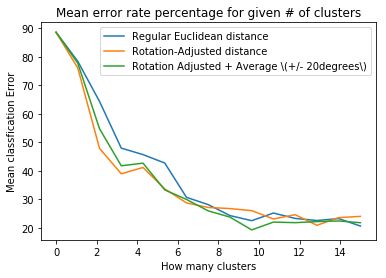

In [34]:
plt.title('Mean error rate percentage for given # of clusters')
plt.xlabel('How many clusters')
plt.ylabel('Mean classfication Error')
x = np.linspace(0,15,15)
plt.plot(x, error_values, label='Regular Euclidean distance')
plt.plot(x, error_values2, label='Rotation-Adjusted distance')
plt.plot(x, error_values3, label='Rotation Adjusted + Average \(+/- 20degrees\)')
plt.legend()

We can see here that the mean classification error on a dataset of 10 000 elements, is lower using our rotation-adjusted similarity measure, up until 6 clusters, after which it performs slightly worse than the regular euclidean distance. At 20 clusters, which is what we are most interested in when working on MNIST.

### Testing with Euclidean distance for baseline

In [29]:

# Parameters: # of clusters, dataset, labels
model = agglo_cluster(10, x_test, y_test)

print('\n--------------------------------------------')

model.cluster_matrix()

print('\n--------------------------------------------')

ave_error = model.error_rate()

Training...
Training completed.
It took us  49.015625  seconds to cluster  10000   datapoints in  10 clusters

--------------------------------------------

True labels matrix

[[  0.   2.   2.   3. 734.   7.   1.  59.   3. 789.]
 [959.   0.  10.   0.   0.   5.   7.   0.   3.   1.]
 [  2.   5.  11. 920.   1. 248.   5.   2. 162.  17.]
 [  3.   0.  13.  59.   4. 416.   4.   9. 768.  17.]
 [  9.   6.   7.   6.  24.  15. 933.   1.   4.   3.]
 [  0. 763.   0.   0.   1.   0.   0.   4.   3.   1.]
 [  0.   3. 908.   2.   2.   0.   1.   9.   8.   4.]
 [  4.   2.  62.   9. 201. 201.   5. 232.  18. 156.]
 [  2.   0.  18.  11.  12.   0.   0. 704.   5.  20.]
 [  1. 354.   1.   0.   3.   0.   2.   8.   0.   1.]]

This calculates what each clusters contain 
Rows are clusters and columns are true labels of this cluster elements

--------------------------------------------
Assigned labels for each cluster:  [9 0 3 8 6 1 2 7 7 1]

Misclassified examples in cluster 'index':  [811.  26. 453. 525.  75.   

### Now, testing algorithm with our adjusted similarity measure

In [30]:
# Parameters: # of clusters, dataset, labels

model2 = agglo_cluster(10, x_test_adj, y_test)



Training...
Training completed.
It took us  48.890625  seconds to cluster  10000   datapoints in  10 clusters


In [31]:
model2.cluster_matrix()

ave_err2 = model2.error_rate()


True labels matrix

[[5.000e+00 2.000e+00 1.900e+01 1.820e+02 7.000e+00 6.520e+02 3.600e+01
  3.000e+00 8.670e+02 2.600e+01]
 [7.000e+00 0.000e+00 9.000e+00 2.000e+00 2.250e+02 1.570e+02 7.370e+02
  1.000e+01 1.000e+01 4.800e+01]
 [0.000e+00 9.000e+00 8.540e+02 9.000e+00 3.000e+00 0.000e+00 0.000e+00
  8.000e+00 8.000e+00 1.000e+00]
 [3.310e+02 0.000e+00 4.000e+00 0.000e+00 1.000e+00 7.000e+00 1.480e+02
  1.000e+00 0.000e+00 2.000e+00]
 [2.000e+00 1.000e+00 6.600e+01 1.000e+01 2.970e+02 4.400e+01 1.500e+01
  5.410e+02 3.600e+01 7.270e+02]
 [1.000e+00 1.117e+03 1.000e+00 0.000e+00 0.000e+00 0.000e+00 4.000e+00
  5.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 4.000e+00 8.000e+02 3.000e+00 2.700e+01 5.000e+00
  1.100e+01 3.700e+01 1.100e+01]
 [2.000e+00 5.000e+00 1.000e+01 4.000e+00 4.030e+02 2.000e+00 1.000e+00
  2.300e+01 8.000e+00 1.840e+02]
 [0.000e+00 0.000e+00 6.100e+01 3.000e+00 4.300e+01 3.000e+00 7.000e+00
  4.260e+02 5.000e+00 8.000e+00]
 [6.310e+02 0.000e+00 4.000e+00 0.

### Third testing with dataset adjuste by the two metrics

In [32]:
model3 = agglo_cluster(10,new_x_test, y_test)
model3.cluster_matrix()
ave_error3 = model3.error_rate()

Training...
Training completed.
It took us  48.875  seconds to cluster  10000   datapoints in  10 clusters

True labels matrix

[[1.100e+01 7.000e+00 8.580e+02 1.400e+01 1.940e+02 1.500e+01 4.000e+00
  1.480e+02 2.000e+01 6.400e+01]
 [1.000e+00 0.000e+00 5.500e+01 1.000e+01 7.330e+02 1.200e+01 2.200e+01
  7.000e+01 3.100e+01 8.810e+02]
 [4.000e+00 0.000e+00 0.000e+00 0.000e+00 1.900e+01 8.800e+01 8.150e+02
  0.000e+00 5.000e+00 5.000e+00]
 [0.000e+00 1.000e+00 5.000e+00 2.600e+01 7.000e+00 6.470e+02 5.700e+01
  0.000e+00 2.300e+01 4.000e+00]
 [5.520e+02 0.000e+00 1.000e+00 9.000e+00 0.000e+00 9.000e+00 4.000e+00
  1.000e+00 1.000e+00 2.000e+00]
 [1.000e+00 1.123e+03 2.300e+01 1.500e+01 9.000e+00 2.000e+01 3.800e+01
  3.400e+01 3.900e+01 6.000e+00]
 [0.000e+00 1.000e+00 3.000e+00 8.330e+02 3.000e+00 7.900e+01 3.000e+00
  8.000e+00 1.060e+02 1.200e+01]
 [2.000e+00 1.000e+00 7.800e+01 4.000e+00 2.000e+00 1.000e+00 0.000e+00
  7.630e+02 1.000e+01 1.700e+01]
 [4.080e+02 0.000e+00 4.000e+00 